# Analysis of Experiment Results



Index(['id', 'true_positive', 'false_positive', 'false_negative',
       'true_negative', 'sensitivity', 'specificity', 'prevalence', 'ppv',
       'npv', 'fpr', 'threat_score', 'accuracy', 'balanced_accuracy', 'F1',
       'MCC', 'informedness', 'markedness', 'fit_time_mean', 'fit_time_std',
       'score_time_mean', 'score_time_std', 'test_accuracy_mean',
       'test_accuracy_std', 'train_accuracy_mean', 'train_accuracy_std',
       'test_recall_mean', 'test_recall_std', 'train_recall_mean',
       'train_recall_std', 'test_precision_mean', 'test_precision_std',
       'train_precision_mean', 'train_precision_std', 'test_roc_auc_mean',
       'test_roc_auc_std', 'train_roc_auc_mean', 'train_roc_auc_std',
       'test_f1_mean', 'test_f1_std', 'train_f1_mean', 'train_f1_std',
       'feature', 'event'],
      dtype='object')


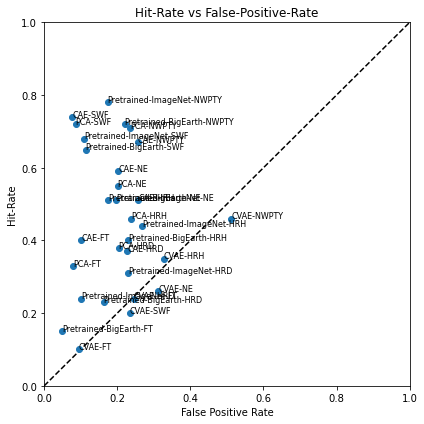

0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, csv

res = pd.read_csv('../workspace/exp_default.csv')
print(res.columns)


# Plot
def plot_roc_curve(metrics):
    plt.figure(figsize=(6,6))
    plt.title('Hit-Rate vs False-Positive-Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(metrics['fpr'],metrics['sensitivity'], 'o')
    plt.xlim((0, 1.))
    plt.ylim((0, 1.))
    plt.xlabel('False Positive Rate')
    plt.ylabel('Hit-Rate')
    # Add IDs
    for i in range(metrics.shape[0]):
        tmp = metrics.iloc[i,:]
        plt.annotate(tmp['id'], (tmp['fpr'], tmp['sensitivity']), size=8)
    # Wrap up
    plt.tight_layout()
    plt.show()
    return(0)

plot_roc_curve(res)

In [2]:
# Meta Analysis
# Plot
def analyze_metrics(metrics, verbose=0):
    # Separate feature and event
    ids = metrics['id']
    # Compare events in total
    subset = metrics.loc[:,['event','feature', 'sensitivity','fpr','threat_score']]
    by_e = subset.groupby(by='event').max()
    by_f = subset.groupby(by='feature').max()
    # Loop through events
    events = list(set(metrics['event']))
    for e in events:
        tmp = metrics.loc[metrics['event']==e,
                          ['id','sensitivity','fpr','threat_score']].sort_values('sensitivity', ascending=False)
        if verbose>0:
            print(e)
            print(tmp)
    # done
    results = {'by_event':by_e.loc[:,['sensitivity','fpr','threat_score']], 
               "by_feature":by_f.loc[:,['sensitivity','fpr','threat_score']]}
    return(results)

tmp = analyze_metrics(res, verbose=1)
print(tmp['by_event'])
print(tmp['by_feature'])

NWPTY
                           id  sensitivity     fpr  threat_score
24  Pretrained-ImageNet-NWPTY         0.78  0.1739        0.6541
18  Pretrained-BigEarth-NWPTY         0.72  0.2200        0.5794
0                   PCA-NWPTY         0.71  0.2358        0.5634
6                   CAE-NWPTY         0.67  0.2556        0.5255
12                 CVAE-NWPTY         0.46  0.5125        0.2959
SWF
                         id  sensitivity     fpr  threat_score
9                   CAE-SWF         0.74  0.0768        0.6118
3                   PCA-SWF         0.72  0.0863        0.5806
27  Pretrained-ImageNet-SWF         0.68  0.1100        0.5285
21  Pretrained-BigEarth-SWF         0.65  0.1137        0.4971
15                 CVAE-SWF         0.20  0.2341        0.1250
HRD
                         id  sensitivity     fpr  threat_score
4                   PCA-HRD         0.38  0.2035        0.2492
10                  CAE-HRD         0.37  0.2267        0.2385
28  Pretrained-ImageNet-HRD  

In [3]:
def flatten_dataframe(df):
    row = {}
    for i in list(df.index):
        for v in df.columns:
            row[i+'-'+v] = df.loc[i,v]
    return(row)

print(flatten_dataframe(tmp['by_event']))

{'FT-sensitivity': 0.4, 'FT-fpr': 0.1017, 'FT-threat_score': 0.2652, 'HRD-sensitivity': 0.38, 'HRD-fpr': 0.2452, 'HRD-threat_score': 0.2492, 'HRH-sensitivity': 0.51, 'HRH-fpr': 0.3269, 'HRH-threat_score': 0.3457, 'NE-sensitivity': 0.59, 'NE-fpr': 0.3115, 'NE-threat_score': 0.4117, 'NWPTY-sensitivity': 0.78, 'NWPTY-fpr': 0.5125, 'NWPTY-threat_score': 0.6541, 'SWF-sensitivity': 0.74, 'SWF-fpr': 0.2341, 'SWF-threat_score': 0.6118}


In [4]:
# Collect more results
res = pd.read_csv('../workspace/exp_default.csv')
res_c08 = pd.read_csv("../workspace/exp_c08.csv")
res_c05 = pd.read_csv("../workspace/exp_c05.csv")
res_dual = pd.read_csv("../workspace/exp_dual.csv")
res_dual_c08 = pd.read_csv("../workspace/exp_dual_c08.csv")
res_dual_c05 = pd.read_csv("../workspace/exp_dual_c05.csv")
res_bal = pd.read_csv("../workspace/exp_balanced.csv")
res_bal_c08 = pd.read_csv("../workspace/exp_balanced_c08.csv")
res_bal_c05 = pd.read_csv("../workspace/exp_balanced_c05.csv")
res_dual_bal = pd.read_csv("../workspace/exp_dual_balanced.csv")
res_dual_bal_c08 = pd.read_csv("../workspace/exp_dual_balanced_c08.csv")
res_dual_bal_c05 = pd.read_csv("../workspace/exp_dual_balanced_c05.csv")

exp_names = ['default', 'c08', 'c05', 'dual', 'dual_c08', 'dual_c05',
       'bal', 'bal_c08', 'bal_c05', 'dual_bal', 'dual_bal_c08', 'dual_bal_c05']

exps = [res, res_c08, res_c05, res_dual, res_dual_c08, res_dual_c05,
       res_bal, res_bal_c08, res_bal_c05, res_dual_bal, res_dual_bal_c08, res_dual_bal_c05]

results = []
summary_by_event = []
for exp in exps:
    tmp = analyze_metrics(exp)
    results.append(tmp)
    summary_by_event.append(flatten_dataframe(tmp['by_event']))
#
summary_by_event = pd.DataFrame(summary_by_event)

In [5]:
summary_by_event.index=exp_names
print(summary_by_event)

              FT-sensitivity  FT-fpr  FT-threat_score  HRD-sensitivity  \
default                 0.40  0.1017           0.2652             0.38   
c08                     0.39  0.1009           0.2576             0.38   
c05                     0.38  0.0943           0.2578             0.39   
dual                    0.39  0.2969           0.2562             0.38   
dual_c08                0.39  0.2961           0.2562             0.39   
dual_c05                0.38  0.2953           0.2584             0.39   
bal                     0.46  0.1754           0.2691             0.45   
bal_c08                 0.45  0.1770           0.2647             0.45   
bal_c05                 0.49  0.1836           0.2829             0.46   
dual_bal                0.46  0.3176           0.2672             0.46   
dual_bal_c08            0.46  0.3176           0.2727             0.45   
dual_bal_c05            0.48  0.3209           0.2791             0.46   

              HRD-fpr  HRD-threat_sco

As shown in the results above, we can see that:
- In terms of event, SWF and NWPTY are easier to detect with the dataset.
- Heavy rainfall is relatively difficult to be detected with the dataset 
- In term of feature vectors, 
    - pre-trained model is especially good for detecting NWPTY, and
    - PCA and CAE are similarly good for SWF and NE.
- Increasing the regularization (smaller C) seemed to improve the prediction ability.

Next, we want to add a few more experiements with even smaller C.

## Additional experiments

In [6]:
res_bal_c01 = pd.read_csv("../workspace/exp_balanced_c01.csv")
res_bal_c001 = pd.read_csv("../workspace/exp_balanced_c001.csv")
res_dual_bal_c01 = pd.read_csv("../workspace/exp_dual_balanced_c01.csv")
res_dual_bal_c001 = pd.read_csv("../workspace/exp_dual_balanced_c001.csv")

exp_names = ['default', 'c08', 'c05', 'dual', 'dual_c08', 'dual_c05',
             'bal', 'bal_c08', 'bal_c05', 'bal_c01', 'bal_c001', 
             'dual_bal', 'dual_bal_c08', 'dual_bal_c05', 'dual_bal_c01', 'dual_bal_c001']

exps = [res, res_c08, res_c05, res_dual, res_dual_c08, res_dual_c05,
        res_bal, res_bal_c08, res_bal_c05, res_bal_c01, res_bal_c001,
        res_dual_bal, res_dual_bal_c08, res_dual_bal_c05, res_dual_bal_c01, res_dual_bal_c001]

results = []
summary_by_event = []
for exp in exps:
    tmp = analyze_metrics(exp)
    results.append(tmp)
    summary_by_event.append(flatten_dataframe(tmp['by_event']))
#
summary_by_event = pd.DataFrame(summary_by_event)

summary_by_event.index=exp_names
print(summary_by_event)

               FT-sensitivity  FT-fpr  FT-threat_score  HRD-sensitivity  \
default                  0.40  0.1017           0.2652             0.38   
c08                      0.39  0.1009           0.2576             0.38   
c05                      0.38  0.0943           0.2578             0.39   
dual                     0.39  0.2969           0.2562             0.38   
dual_c08                 0.39  0.2961           0.2562             0.39   
dual_c05                 0.38  0.2953           0.2584             0.39   
bal                      0.46  0.1754           0.2691             0.45   
bal_c08                  0.45  0.1770           0.2647             0.45   
bal_c05                  0.49  0.1836           0.2829             0.46   
bal_c01                  0.54  0.2531           0.2995             0.49   
bal_c001                 0.66  0.3342           0.3185             0.53   
dual_bal                 0.46  0.3176           0.2672             0.46   
dual_bal_c08             